In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout,Flatten,Convolution2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
# getting the fashion mnist dataset from keras
mnist = keras.datasets.fashion_mnist

In [3]:
(train_images,train_label),(test_images, test_label) = mnist.load_data()
train_images.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
np.max(train_images[0])

255

In [9]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
np.unique(train_label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
class_name = ['t-shirt/top','trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle-boot']

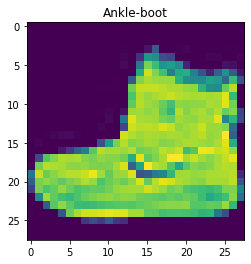

In [12]:
# viewing the image 
plt.imshow(train_images[0])
plt.title(class_name[train_label[0]])
plt.show()

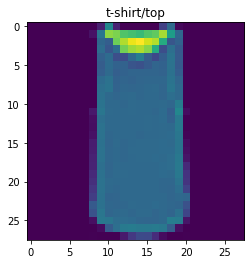

In [13]:
plt.imshow(train_images[2])
plt.title(class_name[train_label[2]])
plt.show()

In [14]:
# normalizing the data
train_images = train_images/255
test_images = test_images/255



In [15]:
# splitting the train data into train and evaluation data
x_train = train_images[:50000]
y_train = train_label[:50000]
x_eval = train_images[50000:]
y_eval = train_label[50000:]

In [16]:
# checking the shape of the evaluation data 
x_eval.shape

(10000, 28, 28)

In [17]:
# checking the shape of the train data
x_train.shape

(50000, 28, 28)

In [18]:
# checing the shape of the evaluation labels and train labels
print(y_train.shape)
print(y_eval.shape)

(50000,)
(10000,)


In [19]:
# encoding the labels to give us columns for each unique label
y_train = to_categorical(y_train,10)
y_eval = to_categorical(y_eval,10)
test_label = to_categorical(test_label,10)

In [20]:
print(y_train.shape)
print(x_eval.shape)
print(y_eval.shape)

(50000, 10)
(10000, 28, 28)
(10000, 10)


In [21]:
# trying to see if normal neural network will give us a nice prediction
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [22]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=8,validation_data=(x_eval,y_eval))

Epoch 1/8
50/50 [==============================] - 2s 32ms/step - loss: 0.8055 - accuracy: 0.7351 - val_loss: 0.5053 - val_accuracy: 0.8187
Epoch 2/8
50/50 [==============================] - 1s 28ms/step - loss: 0.4524 - accuracy: 0.8422 - val_loss: 0.4335 - val_accuracy: 0.8450
Epoch 3/8
50/50 [==============================] - 1s 29ms/step - loss: 0.4033 - accuracy: 0.8585 - val_loss: 0.4030 - val_accuracy: 0.8533
Epoch 4/8
50/50 [==============================] - 1s 28ms/step - loss: 0.3728 - accuracy: 0.8693 - val_loss: 0.3867 - val_accuracy: 0.8630
Epoch 5/8
50/50 [==============================] - 1s 28ms/step - loss: 0.3530 - accuracy: 0.8749 - val_loss: 0.3788 - val_accuracy: 0.8661
Epoch 6/8
50/50 [==============================] - 1s 28ms/step - loss: 0.3359 - accuracy: 0.8804 - val_loss: 0.3675 - val_accuracy: 0.8692
Epoch 7/8
50/50 [==============================] - 1s 28ms/step - loss: 0.3179 - accuracy: 0.8867 - val_loss: 0.3481 - val_accuracy: 0.8758
Epoch 8/8
50/50 [===

In [23]:
test_loss,test_acc = model.evaluate(test_images,test_label)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.8676
0.8676000237464905


In [24]:
prediction = model.predict(test_images)

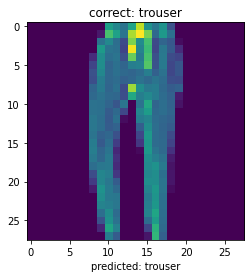

In [25]:
from tensorflow.python.keras.utils.generic_utils import to_list
# checing the predicted data to know if its correct
plt.imshow(test_images[80])
plt.title(f'correct: {class_name[np.argmax(test_label[80])]}')
plt.xlabel(f'predicted: {class_name[np.argmax(prediction[80])]}')
plt.show()

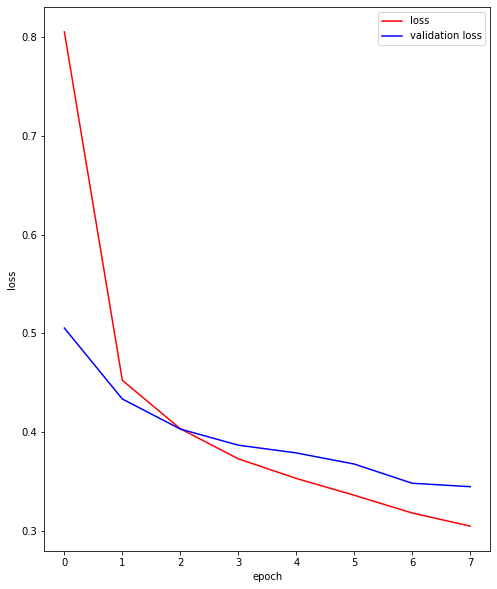

In [27]:
plt.figure(figsize=(8,10))
plt.plot(history.history['loss'],'red',label='loss')
plt.plot(history.history['val_loss'],'blue',label='validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# **using convolution network**

In [28]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))
x_eval = x_eval.reshape((x_eval.shape[0],28,28,1))

In [29]:
model2 = Sequential()
model2.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model2.add(MaxPooling2D((2,2)))
model2.add(Convolution2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [30]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = model2.fit(x_train,y_train,batch_size=1000,epochs=8,validation_data=(x_eval,y_eval))

Epoch 1/8
50/50 [==============================] - 48s 953ms/step - loss: 1.1144 - accuracy: 0.6135 - val_loss: 0.5762 - val_accuracy: 0.7877
Epoch 2/8
50/50 [==============================] - 44s 884ms/step - loss: 0.5556 - accuracy: 0.7991 - val_loss: 0.4413 - val_accuracy: 0.8410
Epoch 3/8
50/50 [==============================] - 44s 881ms/step - loss: 0.4628 - accuracy: 0.8325 - val_loss: 0.3841 - val_accuracy: 0.8610
Epoch 4/8
50/50 [==============================] - 44s 889ms/step - loss: 0.4171 - accuracy: 0.8503 - val_loss: 0.3620 - val_accuracy: 0.8692
Epoch 5/8
50/50 [==============================] - 44s 886ms/step - loss: 0.3785 - accuracy: 0.8623 - val_loss: 0.3368 - val_accuracy: 0.8783
Epoch 6/8
50/50 [==============================] - 45s 894ms/step - loss: 0.3585 - accuracy: 0.8695 - val_loss: 0.3183 - val_accuracy: 0.8854
Epoch 7/8
50/50 [==============================] - 44s 886ms/step - loss: 0.3418 - accuracy: 0.8764 - val_loss: 0.3115 - val_accuracy: 0.8864
Epoch 

In [32]:
test_loss,test_acc = model2.evaluate(test_images,test_label)
print(test_acc)

313/313 [==============================] - 4s 11ms/step - loss: 0.3068 - accuracy: 0.8899
0.8899000287055969


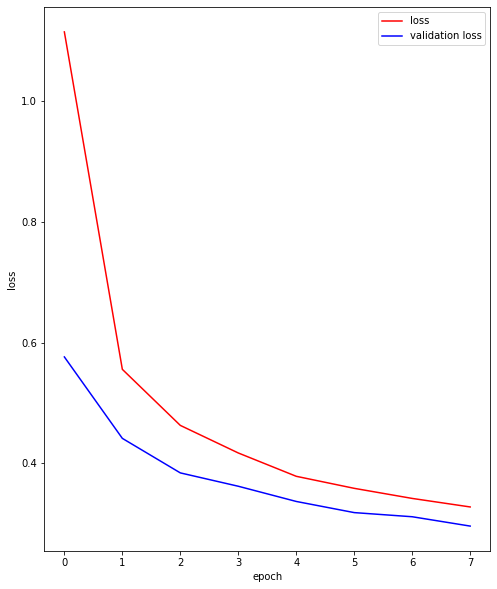

In [33]:
plt.figure(figsize=(8,10))
plt.plot(history.history['loss'],'red',label='loss')
plt.plot(history.history['val_loss'],'blue',label='validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# observation:
the use of cnn clearly shows that for pictures CNN is the best cause i got a better accuracy and the graph with loss vs epoch is better 